In [44]:
import pandas as pd

% matplotlib inline

In [175]:
trip = pd.read_excel(r'J:\Projects\Surveys\HHTravel\Survey2014\Data\Final database\Release 4\2014-pr3-M-hhsurvey-trips-LINKED.xlsx',
                  sheetname='Linked trips')
hh = pd.read_excel(r'J:\Projects\Surveys\HHTravel\Survey2014\Data\Final database\Release 4\2014-pr3-M-hhsurvey-households.xlsx',
                  sheetname='Data')
person = pd.read_excel(r'J:\Projects\Surveys\HHTravel\Survey2014\Data\Final database\Release 4\2014-pr3-M-hhsurvey-persons.xlsx',
                  sheetname='Data1')

In [ ]:
# Categories
# - Trip Purpose (HBW by income, College, Shopping, HBO, School, NHB Other-to-Other, NHB Work-to-Other)
# - Household Size (1, 2, 3, 4+)
# - Income (4 Tiers)
# - # Workers (0, 1, 2, 3+)

# Income is split as follows:
# 1 - <$30k
# 2 - $30-60k
# 3 - $60-90k
# 4 - >90k
# Should these be updated for 2014? 
# Maybe test with what is available

In [176]:
# Add new fields to hh records - number of school aged children, based on person records
# Ages 5-17
person['age_crossclass'] = 'non-student'
person.ix[person['age'].isin([2,3,4]), 'age_crossclass'] = 'student'

# Number of college aged persons (18-24)
person['college_crossclass'] = 'non-college'
person.ix[person['age'].isin([5]), 'college_crossclass'] = 'college'
person.groupby('college_crossclass').count()

,chk,done,notes,personid,hhid,pernum,person_should_take_diary,person_diary_status,proxy,resptype,...,work_parcelID_0,sch_parcelID_0,prevwk_parcelID_0,work_PIN10,work_PSRCPIN10,sch_PIN10,sch_PSRCPIN10,prevwk_PIN10,prevwk_PSRCPIN10,age_crossclass
college_crossclass,,,,,,,,,,,,,,,,,,,,,
college,0,5,5,604,604,604,604,604,604,604,...,604,604,604,356,604,218,604,129,604,604
non-college,0,57,83,11594,11594,11594,11594,11594,10927,11594,...,11594,11594,11594,5732,11594,1470,11594,2120,11594,11594


In [177]:
# Recategorize to match trip rates

# Rename expansion weight column to match trip records

# Workers
hh['numworkers_crossclass'] = hh['numworkers']
hh.ix[hh['numworkers'] >= 3, 'numworkers_crossclass'] = '3+'
hh['numworkers_crossclass'] = hh['numworkers_crossclass'].astype('str')

# Household size
hh['hhsize_crossclass'] = hh['hhsize']
hh.ix[hh['hhsize'] >= 4, 'hhsize_crossclass'] = '4+'
hh['hhsize_crossclass'] = hh['hhsize_crossclass'].astype('str')

# Household income
# Note that exact ranges are not available
hh['income_crossclass'] = hh['hh_income_detailed_imp']
hh.ix[hh['hh_income_detailed_imp'] <= 2, 'income_crossclass'] = '1'    # $25k
hh.ix[(hh['hh_income_detailed_imp'] > 2) & (hh['hh_income_detailed_imp'] <= 4),    # $25-50k
           'income_crossclass'] = '2' 
hh.ix[(hh['hh_income_detailed_imp'] > 4) & (hh['hh_income_detailed_imp'] <= 6),    # $50-100k
           'income_crossclass'] = '3' 
hh.ix[hh['hh_income_detailed_imp'] >= 7, 'income_crossclass'] = '4'    # >$100k

# hh['income_crossclass'] = hh['hh_income_detailed_imp']
# hh.ix[hh['hh_income_detailed_imp'] <= 2, 'income_crossclass'] = '1'    # $25k
# hh.ix[(hh['hh_income_detailed_imp'] > 2) & (hh['hh_income_detailed_imp'] <= 5),    # $25-75k
#            'income_crossclass'] = '2' 
# hh.ix[(hh['hh_income_detailed_imp'] > 5) & (hh['hh_income_detailed_imp'] <= 7),    # $75-150k
#            'income_crossclass'] = '3' 
# hh.ix[hh['hh_income_detailed_imp'] >= 8, 'income_crossclass'] = '4'    # >$150k

# Number of school-aged children (not used in all cross-classifications)


In [178]:
# Join household data to trips
trip_hh = pd.merge(trip, hh, on='hhid', how='left')

In [179]:
# Need to compute this by purpose now too...

# Create trip purposes for cross classification
# Grocery + other = shopping
trip_hh.ix[trip_hh['d_purpose'].isin([4,5]), 'purp_crossclass'] = 'shopping'

# HBO
trip_hh.ix[trip_hh['triptype'] == 2, 'purp_crossclass'] = 'HBO'

# HBW
trip_hh.ix[trip_hh['triptype'] == 1, 'purp_crossclass'] = 'HBW'

# School trips (non college?)
# Get students under 18?
trip_hh.ix[trip_hh['d_purpose'] == 6, 'purp_crossclass'] = 'school'

# College trips
# Get students over 18? 
######################
trip_hh.ix[trip_hh['d_purpose'] == 6, 'purp_crossclass'] = 'college'

# Non-Home Based Other to Other

# Non-Home Based Work to Other 

# Make sure there are no crossovers e.g., HBO that is also school or shopping


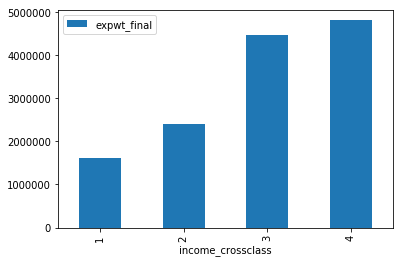

In [132]:
# Check if income ranges are reasonably distributed
trip_hh.groupby('income_crossclass').sum()[['expwt_final']].plot(kind='bar')

In [185]:


# Total persons by cross-classification group (hhsize, numworkers, and income)
total_hh = hh.groupby(['hhsize_crossclass','numworkers_crossclass','income_crossclass']).sum()[['expwt_2']]

# Total trips in cross-classification group by purpose

# HBW
purp = 'HBW'
trips_hbw = trip_hh[trip_hh['purp_crossclass'] == purp].groupby(['hhsize_crossclass','numworkers_crossclass','income_crossclass']).sum()[['expwt_final']]

df_hbw = pd.DataFrame(trips_hbw['expwt_final']/total_hh['expwt_2'])
df_hbw.columns = ['trip_rates']

# Total households in HBW category making trips

# HBO
purp = 'HBO'
trips_hbo = trip_hh[trip_hh['purp_crossclass'] == purp].groupby(['hhsize_crossclass','numworkers_crossclass','income_crossclass']).sum()[['expwt_final']]

df_hbo = pd.DataFrame(trips_hbo['expwt_final']/total_hh['expwt_2'])
df_hbo.columns = ['trip_rates']

# Shopping
purp = 'shopping'
trips_shop = trip_hh[trip_hh['purp_crossclass'] == purp].groupby(['hhsize_crossclass','numworkers_crossclass','income_crossclass']).sum()[['expwt_final']]

df_shop = pd.DataFrame(trips_shop['expwt_final']/total_hh['expwt_2'])
df_shop.columns = ['trip_rates']

# NHBoto

# NHBwto

In [174]:
df_hbw.to_clipboard()

In [151]:
# For School Trips, cross-classify by income and school aged children


trip_rates
hhsize_crossclass numworkers_crossclass income_crossclass            
1                 0                     1                    0.557910
                                        2                    0.613057
                                        3                    0.609857
                                        4                    0.593159
                  1                     1                    0.474539
                                        2                    0.444323
                                        3                    0.423182
                                        4                    0.348232
2                 0                     1                    0.683707
                                        2                    0.874106
                                        3                    0.953634
                                        4                    0.830436
                  1                     1                    0.815166
                                        2                    0.996592
                                        3                    0.636645
                                        4                    0.753776
                  2                     1                    0.769636
                                        2                    0.695559
                                        3                    0.634037
                                        4                    0.502839
3                 0                     1                    1.023972
                                        2                    0.381517
                                        3                    1.096415
                                        4                    0.728968
                  1                     1                    0.394341
                                        2                    1.007391
                                        3                    0.649634
                                        4                    0.927505
                  2                     1                    1.213297
                                        2                    1.320322
                                        3                    0.662950
                                        4                    0.638490
                  3+                    1                         NaN
                                        2                    1.048547
                                        3                    0.374004
                                        4                    0.783906
4+                0                     1                    0.458025
                                        2                    0.689107
                                        3                    1.697074
                                        4                    3.386798
                  1                     1                    1.205731
                                        2                    1.190136
                                        3                    1.023417
                                        4                    1.068282
                  2                     1                    1.362593
                                        2                    2.575490
                                        3                    0.901788
                                        4                    0.805762
                  3+                    1                    0.256989
                                        2                    0.871042
                                        3                    0.432903
                                        4                    0.788340

In [148]:
df_hbo.mean()

trip_rates    5.662151
dtype: float64

In [128]:
trip.groupby('purp_crossclass').count()

,personID,recordID,tripID,hhid,pernum,tripnum,total_trip,last,place_start,place_end,...,d_block,d_pumace10,d_taz10,d_rgc_name,o_parcelID_0,d_parcelID_0,o_PIN10,o_PSRCPIN10,d_PIN10,d_PSRCPIN10
purp_crossclass,,,,,,,,,,,,,,,,,,,,,
HBO,23346,23346,23346,23346,23346,23346,23346,8346,23346,23346,...,23346,23289,23346,4104,23346,23346,22990,22990,22986,23346
HBW,8173,8173,8173,8173,8173,8173,8173,2257,8173,8173,...,8173,8126,8173,2599,8173,8173,8072,8072,8064,8173
college,1642,1642,1642,1642,1642,1642,1642,2,1642,1642,...,1642,1637,1642,260,1642,1642,1614,1614,1617,1642
shopping,3810,3810,3810,3810,3810,3810,3810,0,3810,3810,...,3810,3768,3810,1149,3810,3810,3735,3735,3748,3810


In [129]:
len(trip)

47918

In [ ]:
# 